                                                Árboles de Decisión

In [2]:
#Importar librerías y datos (dataset de iris).
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Cargar el dataset de Iris
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
data['target_names'] = [iris.target_names[i] for i in iris.target]

# Mostrar las primeras filas del dataset
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa  


In [4]:
#Dividir el conjunto de datos en entrenamiento y prueba.
X = data[iris.feature_names]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")

Tamaño del conjunto de entrenamiento: 105
Tamaño del conjunto de prueba: 45



--- Profundidad Máxima: None ---


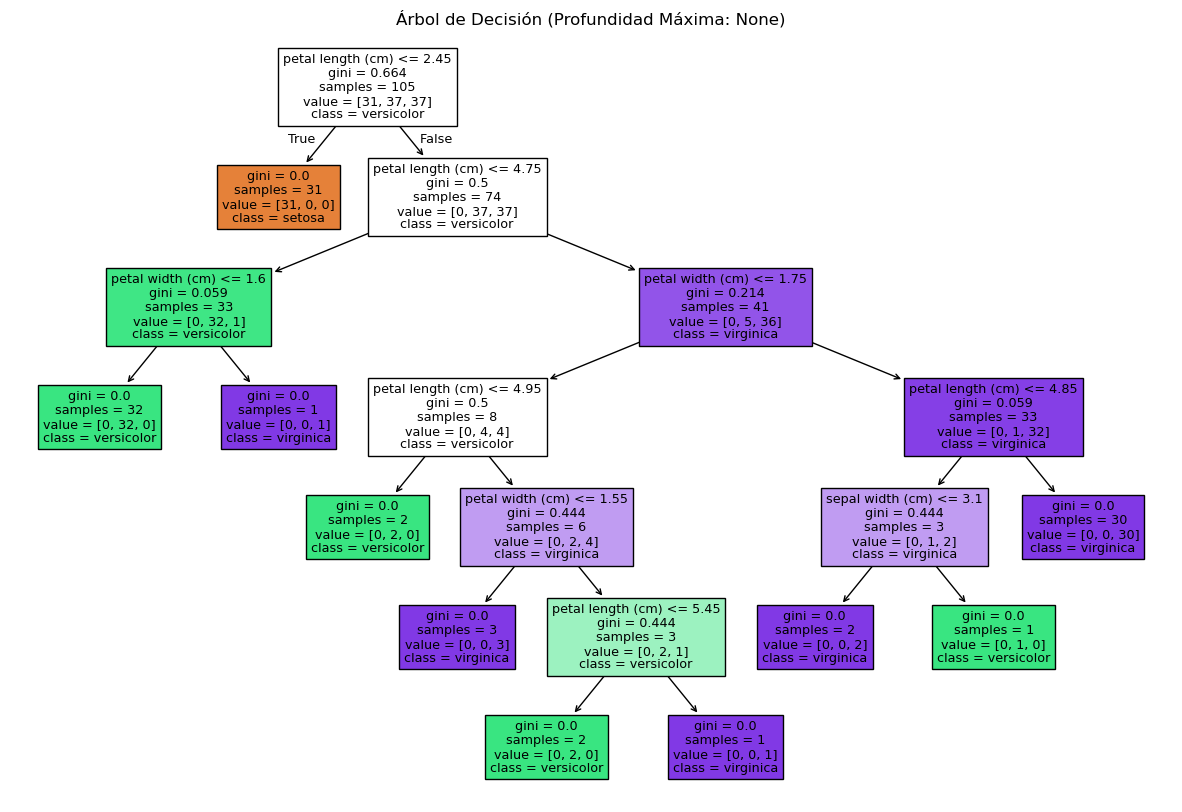


Matriz de Confusión:


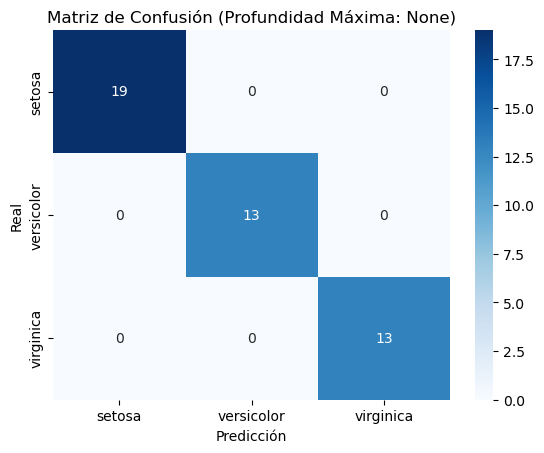


Informe de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


--- Profundidad Máxima: 1 ---


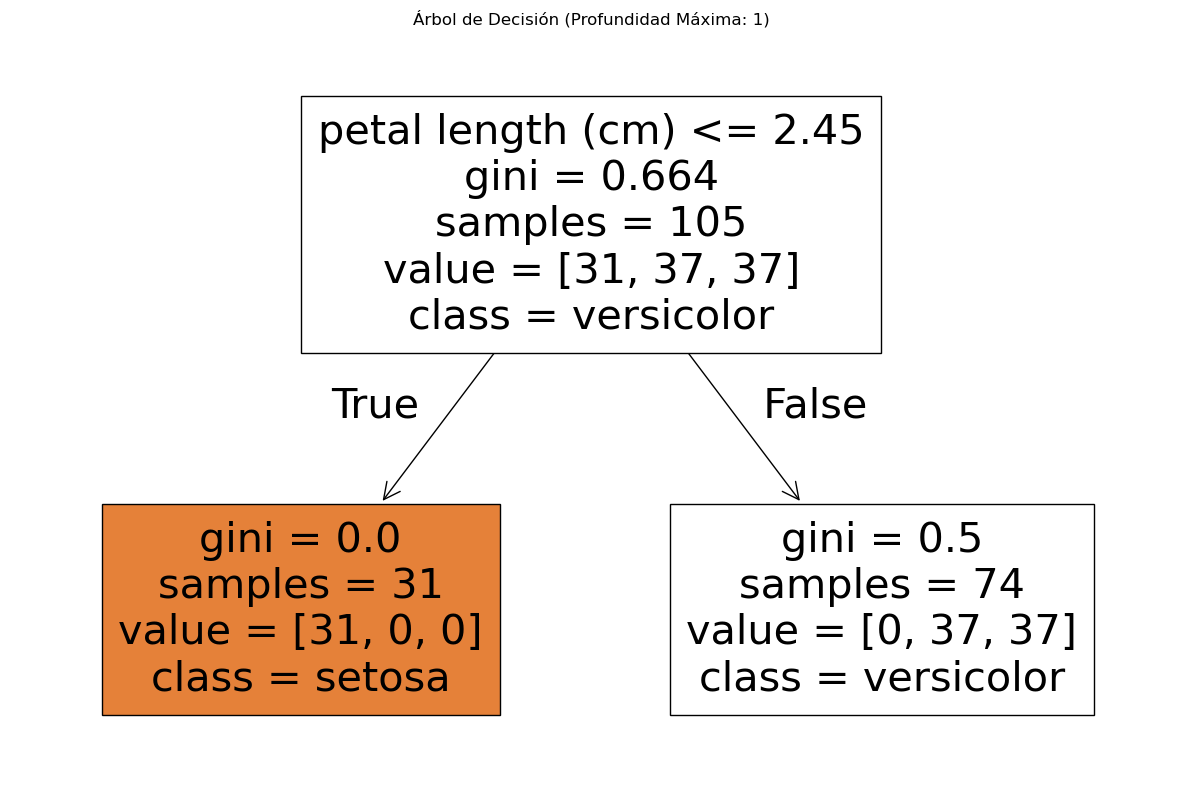


Matriz de Confusión:


C:\Users\arann\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\arann\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\arann\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


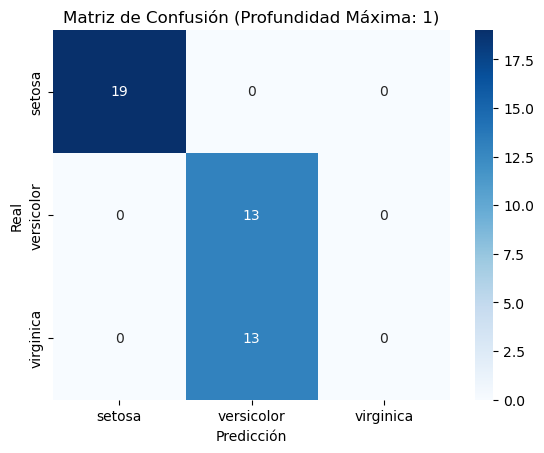


Informe de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.50      1.00      0.67        13
   virginica       0.00      0.00      0.00        13

    accuracy                           0.71        45
   macro avg       0.50      0.67      0.56        45
weighted avg       0.57      0.71      0.61        45


--- Profundidad Máxima: 2 ---


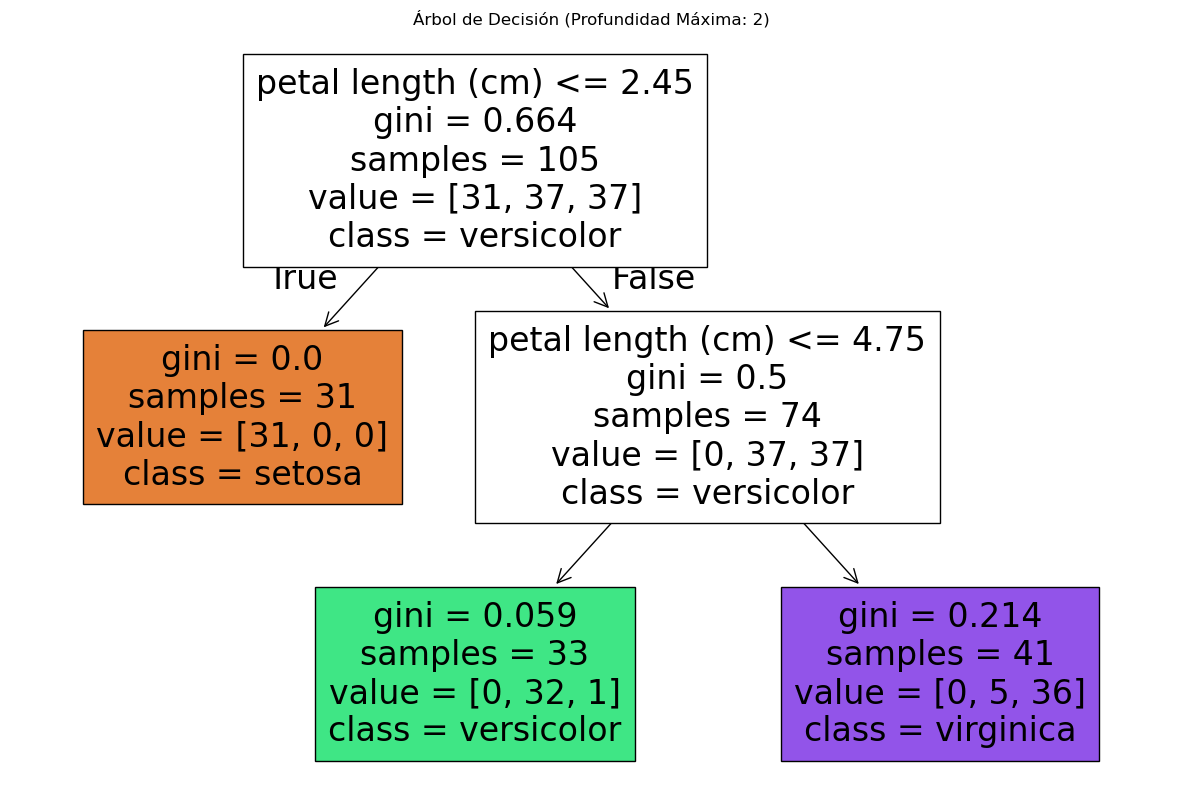


Matriz de Confusión:


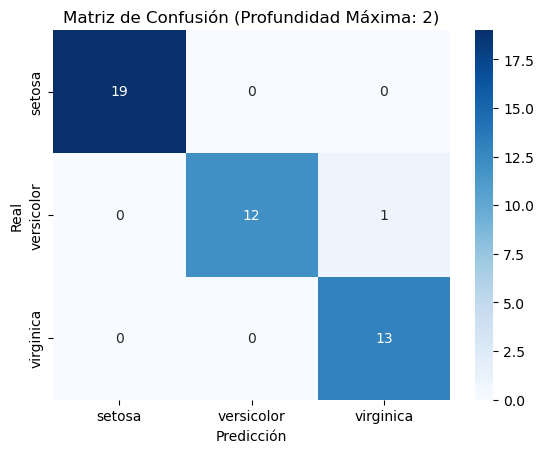


Informe de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


--- Profundidad Máxima: 3 ---


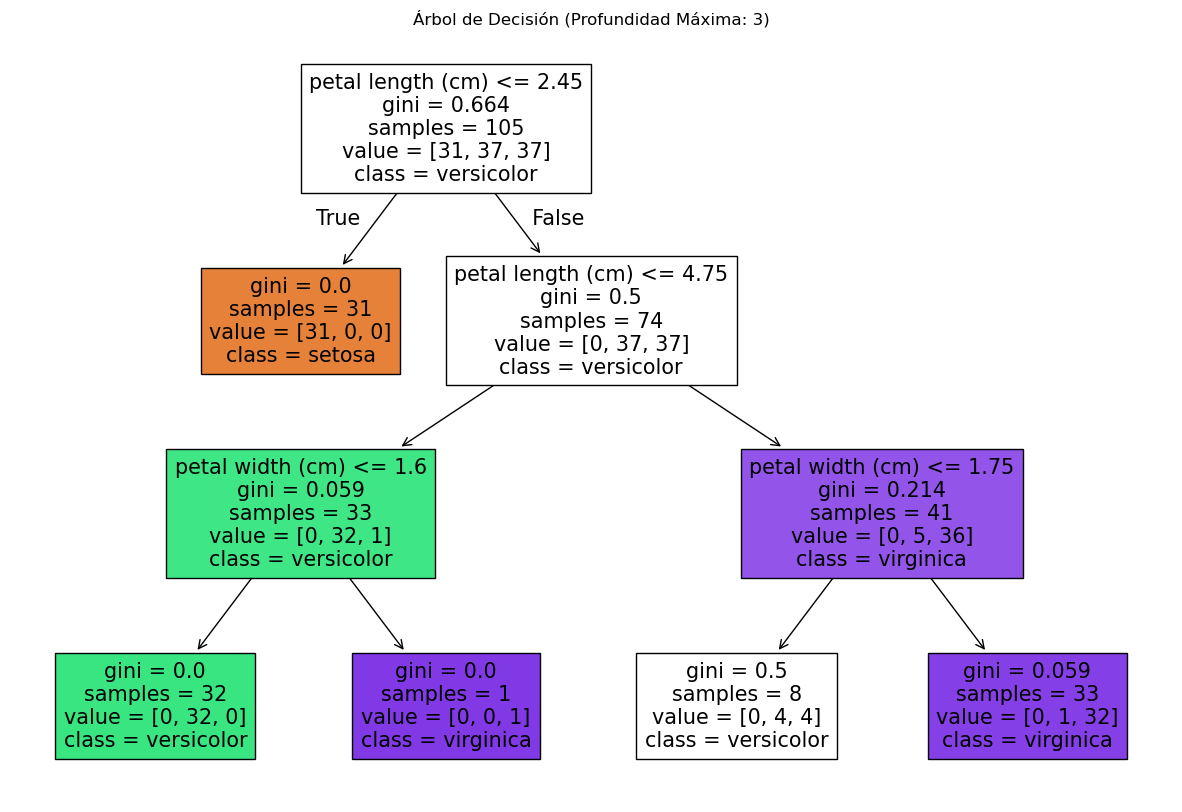


Matriz de Confusión:


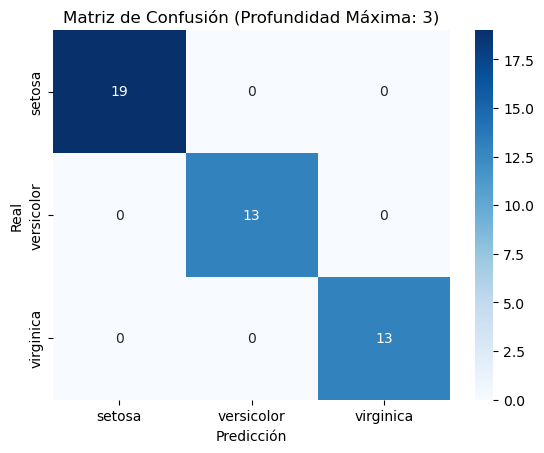


Informe de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


--- Profundidad Máxima: 4 ---
El árbol es demasiado profundo para visualizarlo completamente.

Matriz de Confusión:


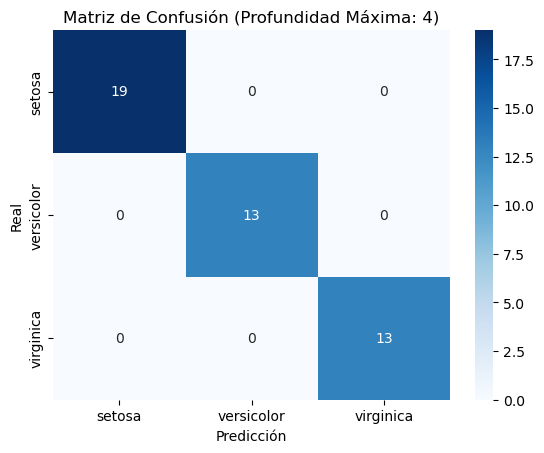


Informe de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


--- Profundidad Máxima: 5 ---
El árbol es demasiado profundo para visualizarlo completamente.

Matriz de Confusión:


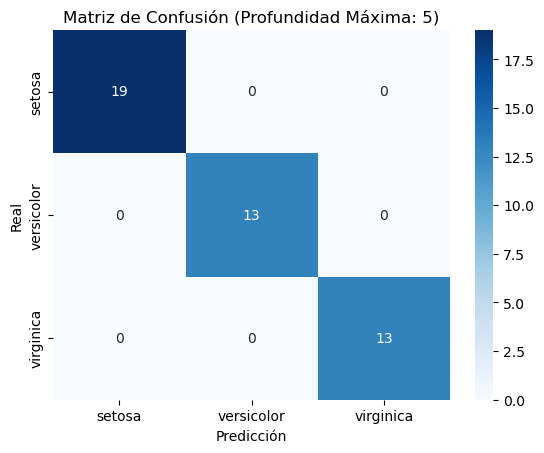


Informe de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [6]:
#Crear y ajustar el modelo de árbol de decisión.
max_depths = [None, 1, 2, 3, 4, 5]  # Lista de diferentes profundidades máximas

for max_depth in max_depths:
    print(f"\n--- Profundidad Máxima: {max_depth} ---")

#Crear el modelo de árbol de decisión con la profundidad máxima especificada
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

#Ajustar el modelo a los datos de entrenamiento
    tree.fit(X_train, y_train)

#Visualizar el árbol de decisión (para profundidades pequeñas)
    if max_depth is None or max_depth <= 3:
        plt.figure(figsize=(15, 10))
        plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
        plt.title(f"Árbol de Decisión (Profundidad Máxima: {max_depth})")
        plt.show()
    else:
        print("El árbol es demasiado profundo para visualizarlo completamente.")

#Evaluar el modelo
    y_pred = tree.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, target_names=iris.target_names)

    print("\nMatriz de Confusión:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión (Profundidad Máxima: {max_depth})')
    plt.show()

    print("\nInforme de Clasificación:")
    print(cr)

                                                Bosques Aleatorios

In [9]:
#Aplicar el modelo para hacer predicciones sobre el conjunto de prueba.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import numpy as np

# Crear el modelo de Bosque Aleatorio
# Ajustamos algunos hiperparámetros comunes
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=4)

# Ajustar el modelo a los datos de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [11]:
# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)


--- Resultados del Bosque Aleatorio ---
Precisión del Bosque Aleatorio: 1.0000

Matriz de Confusión (Bosque Aleatorio):


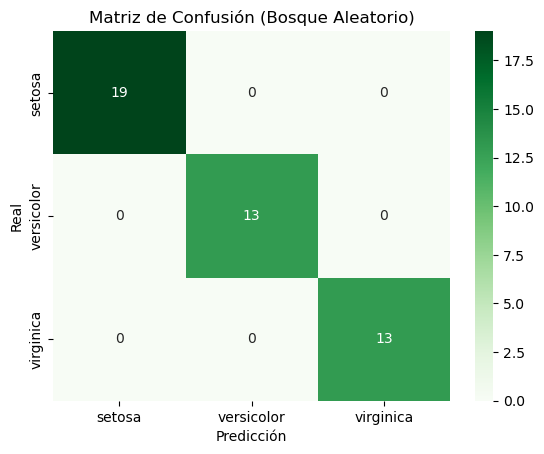


Informe de Clasificación (Bosque Aleatorio):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


--- Comparación con el Mejor Árbol de Decisión (ejemplo con max_depth=3) ---
Precisión del Árbol de Decisión (max_depth=3): 1.0000

Matriz de Confusión (Árbol de Decisión, max_depth=3):


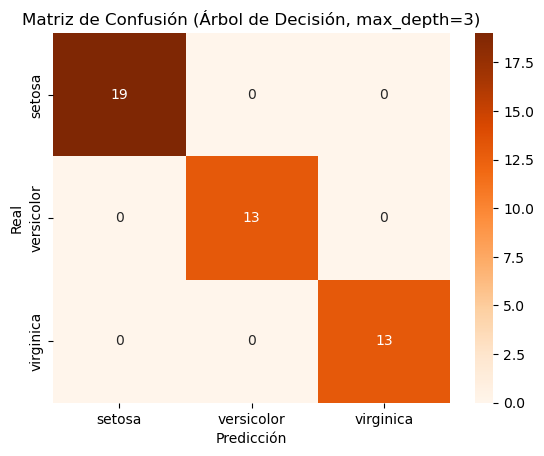


Informe de Clasificación (Árbol de Decisión, max_depth=3):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [13]:
# Evaluar el modelo de Bosque Aleatorio
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cr_rf = classification_report(y_test, y_pred_rf, target_names=iris.target_names)

print("\n--- Resultados del Bosque Aleatorio ---")
print(f"Precisión del Bosque Aleatorio: {accuracy_rf:.4f}")
print("\nMatriz de Confusión (Bosque Aleatorio):")
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Bosque Aleatorio)')
plt.show()

print("\nInforme de Clasificación (Bosque Aleatorio):")
print(cr_rf)

print("\n--- Comparación con el Mejor Árbol de Decisión (ejemplo con max_depth=3) ---")
# (Asumiendo que encontraste que max_depth=3 dio un buen resultado anteriormente)
tree_best = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_best.fit(X_train, y_train)
y_pred_tree_best = tree_best.predict(X_test)
accuracy_tree_best = accuracy_score(y_test, y_pred_tree_best)
cm_tree_best = confusion_matrix(y_test, y_pred_tree_best)
cr_tree_best = classification_report(y_test, y_pred_tree_best, target_names=iris.target_names)

print(f"Precisión del Árbol de Decisión (max_depth=3): {accuracy_tree_best:.4f}")
print("\nMatriz de Confusión (Árbol de Decisión, max_depth=3):")
sns.heatmap(cm_tree_best, annot=True, fmt='d', cmap='Oranges',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Árbol de Decisión, max_depth=3)')
plt.show()

print("\nInforme de Clasificación (Árbol de Decisión, max_depth=3):")
print(cr_tree_best)


--- Importancia de Características (Gini) ---
             Feature  Importance
3   petal width (cm)    0.439763
2  petal length (cm)    0.422491
0  sepal length (cm)    0.103438
1   sepal width (cm)    0.034308


C:\Users\arann\AppData\Local\Temp\ipykernel_8356\2592598512.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


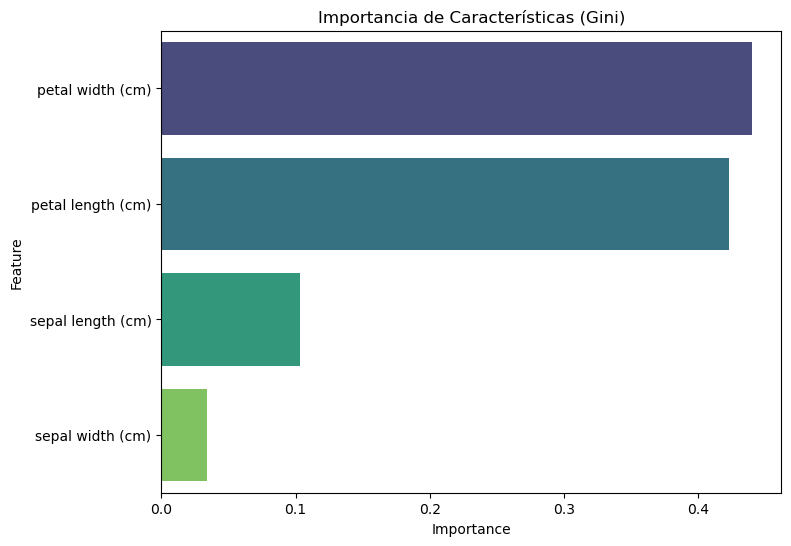

In [15]:
# Importancia de características basada en la impureza
feature_importances = rf_model.feature_importances_

# Crear un DataFrame para visualizar la importancia
feature_importance_df = pd.DataFrame({'Feature': iris.feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\n--- Importancia de Características (Gini) ---")
print(feature_importance_df)

# Visualizar la importancia de las características
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Importancia de Características (Gini)')
plt.show()


--- Importancia de Características por Permutación ---
             Feature  Importance
3   petal width (cm)    0.188889
2  petal length (cm)    0.075556
0  sepal length (cm)    0.000000
1   sepal width (cm)    0.000000


C:\Users\arann\AppData\Local\Temp\ipykernel_8356\2315896396.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=permutation_importance_df, palette='mako')


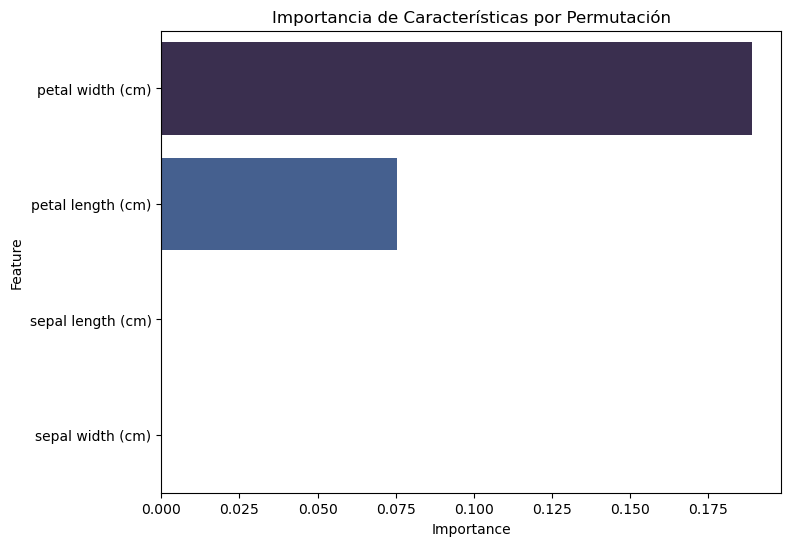

In [17]:
# Importancia de características por permutación
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Crear un DataFrame para visualizar la importancia por permutación
permutation_importance_df = pd.DataFrame({'Feature': iris.feature_names, 'Importance': result.importances_mean})
permutation_importance_df = permutation_importance_df.sort_values(by='Importance', ascending=False)

print("\n--- Importancia de Características por Permutación ---")
print(permutation_importance_df)

# Visualizar la importancia por permutación
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=permutation_importance_df, palette='mako')
plt.title('Importancia de Características por Permutación')
plt.show()